In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import scipy

# Load and transform data

In [2]:
results1 = pd.read_csv("rm1_results.csv")
results2 = pd.read_csv("rm2_results.csv")
results5 = pd.read_csv("rm5_results.csv")

In [3]:
# extract OD method to separate column
results1['od'] = results1['step_1'].apply(lambda x: re.search('\'name\': \'(.*?)\'', x).group(1))
results2['od'] = results2['step_1'].apply(lambda x: re.search('\'name\': \'(.*?)\'', x).group(1))
results5['od'] = results5['step_1'].apply(lambda x: re.search('\'name\': \'(.*?)\'', x).group(1))

In [4]:
# rename datasets
for results in [results1, results2, results5]:
    results['dataset'] = results['dataset'].apply(lambda x: x.replace('reduced-', ''))
    results.loc[results['dataset'] == '100', 'dataset'] = 'bin_100'
    results.loc[results['dataset'] == '75', 'dataset'] = 'bin_75'
    results.loc[results['dataset'] == '50', 'dataset'] = 'bin_50'

In [5]:
results1

,dataset,clf,clf_family,clf_params,step_0,step_1,step_2,accuracy,od
0,bin_100,DecisionTable,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'CODB', 'parameters': {'jar_path': 'd...",{'RM': 1.0},0.83874,CODB
1,bin_100,DecisionTable,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'ClassLikelihood', 'parameters': {}}",{'RM': 1.0},0.83530,ClassLikelihood
2,bin_100,DecisionTable,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'ClassLikelihoodDifference', 'paramet...",{'RM': 1.0},0.83530,ClassLikelihoodDifference
3,bin_100,DecisionTable,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'DS', 'parameters': {}}",{'RM': 1.0},0.83070,DS
4,bin_100,DecisionTable,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'IsolationForest', 'parameters': {'be...",{'RM': 1.0},0.82594,IsolationForest
...,...,...,...,...,...,...,...,...,...
1183,tf-idf-75,ZeroR,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'LOF', 'parameters': {'contamination'...",{'RM': 1.0},0.53741,LOF
1184,tf-idf-75,ZeroR,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'NearestNeighbors', 'parameters': {}}",{'RM': 1.0},0.53741,NearestNeighbors
1185,tf-idf-75,ZeroR,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'OneClassSVM', 'parameters': {'gamma'...",{'RM': 1.0},0.53741,OneClassSVM
1186,tf-idf-75,ZeroR,rules,[],"{'data_path': 'data/datasets/', 'k_of_folds': ...","{'name': 'TD', 'parameters': {}}",{'RM': 1.0},0.53741,TD


# Plots

## Plot accuracy by dataset
the suffix number represents percent of optimal attributes

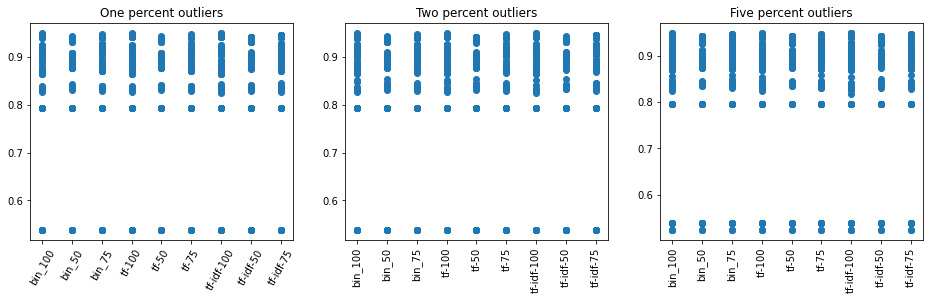

In [52]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.scatter(results1['dataset'], results1['accuracy'])
plt.xticks(rotation=60)
plt.title("One percent outliers")

plt.subplot(1,3,2)
plt.scatter(results2['dataset'], results2['accuracy'])
plt.xticks(rotation='vertical')
plt.title("Two percent outliers")

plt.subplot(1,3,3)
plt.scatter(results5['dataset'], results5['accuracy'])
plt.xticks(rotation='vertical')
plt.title("Five percent outliers")
plt.show()

## Plot accuracy by classifier

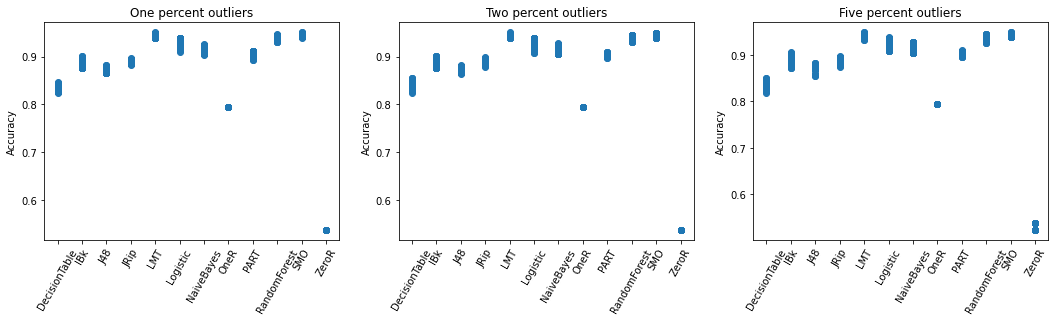

In [63]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(results1['clf'], results1['accuracy'])
plt.xticks(rotation=60)
plt.ylabel("Accuracy")
plt.title("One percent outliers")

plt.subplot(1,3,2)
plt.scatter(results2['clf'], results2['accuracy'])
plt.xticks(rotation=60)
plt.ylabel("Accuracy")
plt.title("Two percent outliers")

plt.subplot(1,3,3)
plt.scatter(results5['clf'], results5['accuracy'])
plt.xticks(rotation=60)
plt.ylabel("Accuracy")
plt.title("Five percent outliers")
plt.show()

## Plot accuracy by outlier detection method

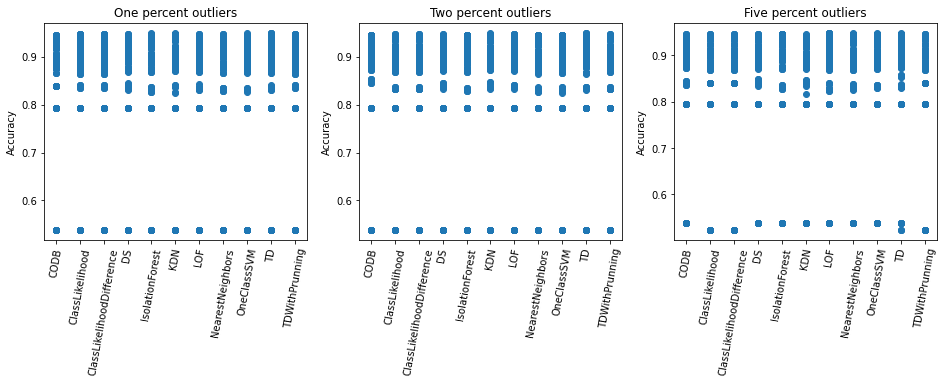

In [64]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.scatter(results1['od'], results1['accuracy'])
plt.xticks(rotation=80)
plt.ylabel("Accuracy")
plt.title("One percent outliers")

plt.subplot(1,3,2)
plt.scatter(results2['od'], results2['accuracy'])
plt.xticks(rotation=80)
plt.ylabel("Accuracy")
plt.title("Two percent outliers")

plt.subplot(1,3,3)
plt.scatter(results5['od'], results5['accuracy'])
plt.xticks(rotation=80)
plt.ylabel("Accuracy")
plt.title("Five percent outliers")
plt.show()

# Look at top 10 results

## One percent outliers

In [53]:
results1.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True).head(10).drop(['clf_family', 'clf_params', 'step_0', 'step_1', 'step_2'], axis=1)

,dataset,clf,accuracy,od
0,tf-idf-100,LMT,0.95095,KDN
1,tf-100,SMO,0.95079,TD
2,bin_100,SMO,0.95062,TD
3,tf-idf-100,SMO,0.95013,TD
4,tf-idf-100,LMT,0.94931,IsolationForest
5,bin_100,LMT,0.94931,TD
6,tf-idf-100,SMO,0.94931,OneClassSVM
7,tf-100,LMT,0.94915,IsolationForest
8,bin_100,LMT,0.94915,IsolationForest
9,tf-idf-100,SMO,0.94915,KDN


## Two percent outliers

In [54]:
results2.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True).head(10).drop(['clf_family', 'clf_params', 'step_0', 'step_1', 'step_2'], axis=1)

,dataset,clf,accuracy,od
0,tf-idf-100,LMT,0.95095,KDN
1,bin_100,SMO,0.94964,TD
2,tf-idf-100,SMO,0.94947,TD
3,tf-100,LMT,0.94947,TD
4,tf-100,SMO,0.94915,TD
5,tf-100,SMO,0.94833,TDWithPrunning
6,tf-100,SMO,0.94833,ClassLikelihood
7,tf-idf-100,SMO,0.94833,TDWithPrunning
8,bin_100,SMO,0.94833,ClassLikelihood
9,bin_100,SMO,0.94833,ClassLikelihoodDifference


## Five percent outliers

In [55]:
results5.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True).head(10).drop(['clf_family', 'clf_params', 'step_0', 'step_1', 'step_2'], axis=1)

,dataset,clf,accuracy,od
0,bin_100,SMO,0.94915,LOF
1,tf-100,SMO,0.94915,LOF
2,tf-idf-100,SMO,0.94898,LOF
3,tf-100,LMT,0.94865,LOF
4,bin_100,LMT,0.94865,LOF
5,tf-idf-100,LMT,0.94849,OneClassSVM
6,tf-idf-100,LMT,0.94849,LOF
7,tf-idf-100,LMT,0.94832,TD
8,tf-idf-100,LMT,0.94783,NearestNeighbors
9,bin_100,LMT,0.94734,NearestNeighbors


# Boxplots

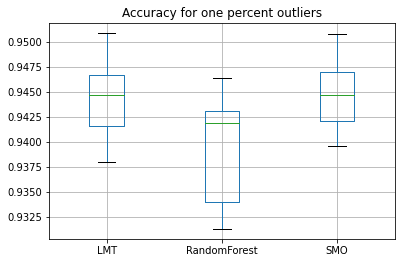

In [84]:
results1[results1['clf'].isin(['LMT', 'SMO', 'RandomForest'])].boxplot(column='accuracy', by='clf')
title_boxplot = 'Accuracy for one percent outliers'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.xlabel('')
plt.show()

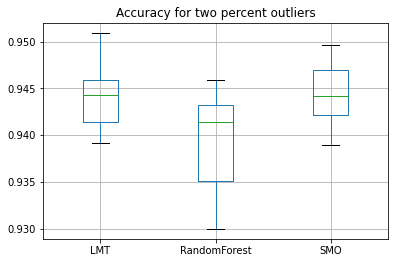

In [85]:
results2[results2['clf'].isin(['LMT', 'SMO', 'RandomForest'])].boxplot(column='accuracy', by='clf')
title_boxplot = 'Accuracy for two percent outliers'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.xlabel('')
plt.show()

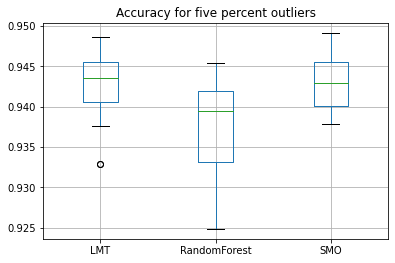

In [83]:
results5[results5['clf'].isin(['LMT', 'SMO', 'RandomForest'])].boxplot(column='accuracy', by='clf')
title_boxplot = 'Accuracy for five percent outliers'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.xlabel('')
plt.show()

# Comparison of different combinations of {PP,OD} + CLF

In [5]:
results = pd.concat([results1, results2, results5], ignore_index=True)
results = results.drop(['clf_family', 'clf_params', 'step_0', 'step_1', 'step_2'], axis=1)

In [9]:
results

,dataset,clf,accuracy,od
0,bin_100,DecisionTable,0.83874,CODB
1,bin_100,DecisionTable,0.83530,ClassLikelihood
2,bin_100,DecisionTable,0.83530,ClassLikelihoodDifference
3,bin_100,DecisionTable,0.83070,DS
4,bin_100,DecisionTable,0.82594,IsolationForest
...,...,...,...,...
3559,tf-idf-75,ZeroR,0.53741,LOF
3560,tf-idf-75,ZeroR,0.53741,NearestNeighbors
3561,tf-idf-75,ZeroR,0.53741,OneClassSVM
3562,tf-idf-75,ZeroR,0.53741,TD


<AxesSubplot:xlabel='clf', ylabel='dataset'>

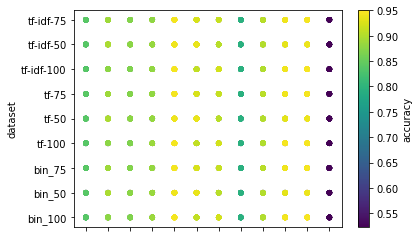

In [11]:
results.plot.scatter(x='clf', y='dataset', c='accuracy', colormap='viridis')

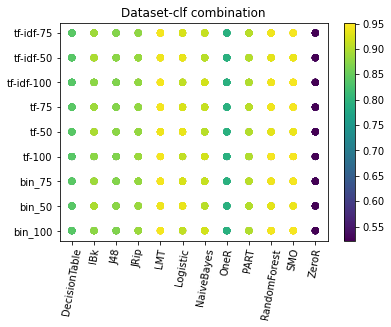

In [17]:
fig, ax = plt.subplots()
im = ax.scatter(results['clf'], results['dataset'], c=results['accuracy'])
plt.xticks(rotation=80)
plt.title("Dataset-clf combination")
fig.colorbar(im, ax=ax)
plt.show()

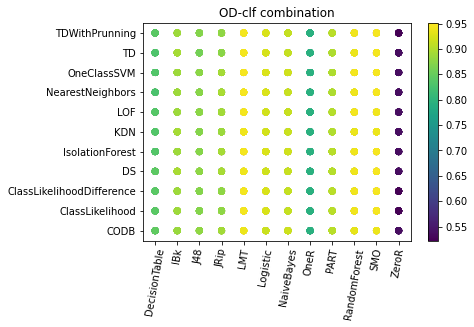

In [19]:
fig, ax = plt.subplots()
im = ax.scatter(results['clf'], results['od'], c=results['accuracy'])
plt.xticks(rotation=80)
plt.title("OD-clf combination")
fig.colorbar(im, ax=ax)
plt.show()

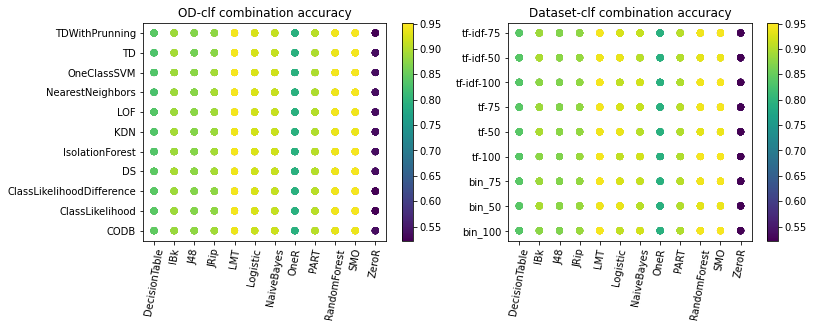

In [31]:
plt.figure(figsize=(12,4))

ax = plt.subplot(1,2,1)
im = plt.scatter(results['clf'], results['od'], c=results['accuracy'])
plt.xticks(rotation=80)
plt.title("OD-clf combination accuracy")
fig.colorbar(im, ax=ax)

ax = plt.subplot(1,2,2)
im = plt.scatter(results['clf'], results['dataset'], c=results['accuracy'])
plt.xticks(rotation=80)
plt.title("Dataset-clf combination accuracy")
fig.colorbar(im, ax=ax)

plt.show()

## Wilcoxon signed-rank test

In [6]:
from scipy.stats import wilcoxon

In [8]:
lmt = results1[results1['clf'] == 'LMT']
smo = results1[results1['clf'] == 'SMO']
randomForest = results1[results1['clf'] == 'RandomForest']

In [11]:
wilcoxon(lmt['accuracy'], smo['accuracy'])

WilcoxonResult(statistic=2040.5, pvalue=0.12925474094681655)

In [13]:
wilcoxon(lmt['accuracy'], randomForest['accuracy'])

WilcoxonResult(statistic=10.0, pvalue=1.1272227799993384e-17)

In [14]:
wilcoxon(smo['accuracy'], randomForest['accuracy'])

WilcoxonResult(statistic=4.0, pvalue=6.402727697377569e-18)